In [1]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('', kind='train')
X_test, y_test = mnist_reader.load_mnist('', kind='t10k')

In [2]:
import numpy as np

# Convert target variables to uint8 data type
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [4]:
X_train[0].shape

(784,)

### ***1. Design a Neural Network***

In [5]:
from keras import Sequential
from keras.layers import Dense

2024-03-21 23:36:20.447487: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 23:36:20.518469: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 23:36:20.518516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 23:36:20.520637: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 23:36:20.532030: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 23:36:20.533088: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [6]:
model = Sequential()

2024-03-21 23:36:23.758187: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-03-21 23:36:23.758234: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: faraz-Lenovo-ideapad-520-15IKB
2024-03-21 23:36:23.758248: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: faraz-Lenovo-ideapad-520-15IKB
2024-03-21 23:36:23.758348: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.161.7
2024-03-21 23:36:23.758386: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.161.7
2024-03-21 23:36:23.758397: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.161.7


In [7]:
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta=0.01, patience= 4, verbose= 1)

# Model Check Point
mc = ModelCheckpoint('./best_nn_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

In [10]:
history_nn = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks = cb)

Epoch 1/20
1873/1875 [============================>.] - ETA: 0s - loss: 1.7571 - accuracy: 0.6760
Epoch 1: val_accuracy improved from -inf to 0.72060, saving model to ./best_nn_model.keras
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7558 - accuracy: 0.6761 - val_loss: 0.6961 - val_accuracy: 0.7206
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.6517 - accuracy: 0.7477
Epoch 2: val_accuracy improved from 0.72060 to 0.78270, saving model to ./best_nn_model.keras
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6517 - accuracy: 0.7477 - val_loss: 0.5988 - val_accuracy: 0.7827
Epoch 3/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.5422 - accuracy: 0.8091
Epoch 3: val_accuracy improved from 0.78270 to 0.80530, saving model to ./best_nn_model.keras
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5421 - accuracy: 0.8091 - val_loss: 0.5621 - val_accuracy: 0.8053
Epoch 4/20
1875/1875 [======

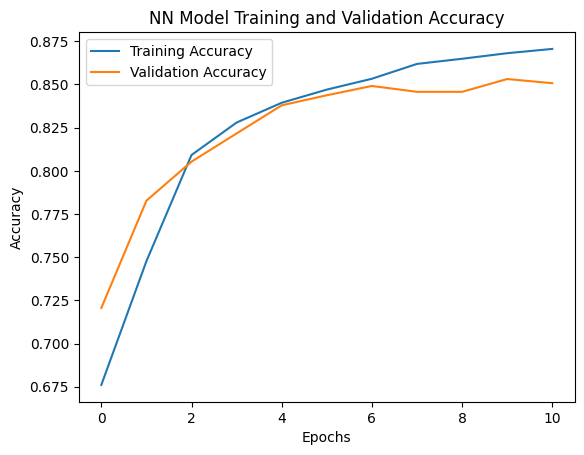

In [11]:
import matplotlib.pyplot as plt
plt.plot(history_nn.history['accuracy'], label= 'Training Accuracy')
plt.plot(history_nn.history['val_accuracy'], label= 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('NN Model Training and Validation Accuracy')
plt.legend()
plt.show()

In [12]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix

y_pred_nn = model.predict(X_test)
y_pred_labels_nn = np.argmax(y_pred_nn, axis=1)

mae = mean_absolute_error(y_test, y_pred_labels_nn)
mse = mean_squared_error(y_test, y_pred_labels_nn)
precision = precision_score(y_test, y_pred_labels_nn, average='weighted')
recall = recall_score(y_test, y_pred_labels_nn, average='weighted')
f1 = f1_score(y_test, y_pred_labels_nn, average='weighted')
cm = confusion_matrix(y_test, y_pred_labels_nn)

313/313 [==============================] - 1s 2ms/step


In [13]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'f1 score {f1}')
print()
print(cm)

Mean Absolute Error (MAE): 0.4923
Mean Squared Error (MSE): 2.0485
Precision Score: 0.8542565904514354
Recall Score: 0.8507
f1 score 0.8495001413158919

[[895   0   8  14   0   0  78   0   5   0]
 [  7 951   2  30   1   0   8   0   1   0]
 [ 26   0 824   7  63   0  79   0   1   0]
 [ 71   2   8 850  27   0  38   0   4   0]
 [  0   0 202  26 695   0  76   0   1   0]
 [  0   0   0   1   0 890   1  75   7  26]
 [248   0 129  24  71   0 518   0  10   0]
 [  0   0   0   0   0   4   0 975   1  20]
 [  0   0   0   2   1   0  31   6 960   0]
 [  0   0   0   0   0   4   2  45   0 949]]


###  ***2. Design a Convolutional Network***

In [14]:
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

model_cnn = Sequential()

model_cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model_cnn.add(MaxPool2D((2,2)))

model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPool2D((2,2)))

model_cnn.add(Flatten())

model_cnn.add(Dropout(0.25))

model_cnn.add(Dense(10, activation='Softmax'))


In [15]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [16]:
model_cnn.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta=0.01, patience= 4, verbose= 1)

# Model Check Point
mc = ModelCheckpoint('./best_cnn_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

In [18]:
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=20, validation_data=(X_test_cnn, y_test), callbacks = cb)

Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.8089 - accuracy: 0.7837
Epoch 1: val_accuracy improved from -inf to 0.84290, saving model to ./best_cnn_model.keras
1875/1875 [==============================] - 29s 15ms/step - loss: 0.8089 - accuracy: 0.7837 - val_loss: 0.4359 - val_accuracy: 0.8429
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.4355 - accuracy: 0.8438
Epoch 2: val_accuracy improved from 0.84290 to 0.85460, saving model to ./best_cnn_model.keras
1875/1875 [==============================] - 27s 15ms/step - loss: 0.4355 - accuracy: 0.8438 - val_loss: 0.4015 - val_accuracy: 0.8546
Epoch 3/20
1872/1875 [============================>.] - ETA: 0s - loss: 0.3899 - accuracy: 0.8575
Epoch 3: val_accuracy improved from 0.85460 to 0.86930, saving model to ./best_cnn_model.keras
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3897 - accuracy: 0.8576 - val_loss: 0.3649 - val_accuracy: 0.8693
Epoch 4/20
1872/187

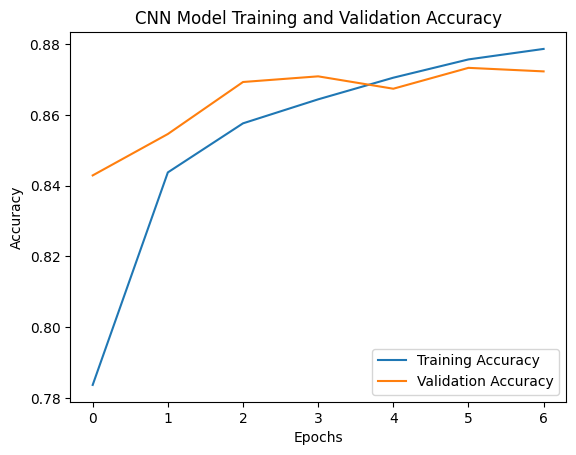

In [19]:
import matplotlib.pyplot as plt
plt.plot(history_cnn.history['accuracy'], label= 'Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label= 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model Training and Validation Accuracy')
plt.legend()
plt.show()

In [20]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score

y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_labels_cnn = np.argmax(y_pred_cnn, axis=1)

mae = mean_absolute_error(y_test, y_pred_labels_cnn)
mse = mean_squared_error(y_test, y_pred_labels_cnn)
precision = precision_score(y_test, y_pred_labels_cnn, average='weighted')
recall = recall_score(y_test, y_pred_labels_cnn, average='weighted')
f1 = f1_score(y_test, y_pred_labels_cnn, average='weighted')
cm = confusion_matrix(y_test, y_pred_labels_cnn)

313/313 [==============================] - 1s 4ms/step


In [21]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'f1 score {f1}')
print()
print(cm)

Mean Absolute Error (MAE): 0.4158
Mean Squared Error (MSE): 1.7286
Precision Score: 0.8721136884581161
Recall Score: 0.8723
f1 score 0.8708799991560878

[[869   0  31  18   8   1  70   0   3   0]
 [  3 962   0  22   6   0   4   0   3   0]
 [ 13   0 820   8 107   0  50   0   2   0]
 [ 25   1  20 885  38   0  28   0   3   0]
 [  2   0  94  26 793   0  84   0   1   0]
 [  0   0   0   1   0 954   0  31   1  13]
 [192   0 136  22  79   0 553   0  18   0]
 [  0   0   0   0   0   8   0 973   0  19]
 [  2   0   6   3   5   4  11   3 964   2]
 [  0   0   0   0   0   6   0  44   0 950]]


### ***3. Use Transfer Learning Approach***

In [44]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [23]:
X_train_pret = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test_pret = X_test.reshape(-1, 28, 28, 1) / 255.0

In [24]:
X_train_pret.shape

(60000, 28, 28, 1)

In [25]:
# Resize the images to meet the minimum input size requirement of 32x32
X_train_resized = []
X_test_resized = []
for img in X_train_pret:
    img_resized = array_to_img(img).resize((32, 32))
    X_train_resized.append(img_to_array(img_resized))
for img in X_test_pret:
    img_resized = array_to_img(img).resize((32, 32))
    X_test_resized.append(img_to_array(img_resized))
X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)


In [43]:
X_train_resized.shape

(60000, 32, 32, 1)

In [49]:
pret_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [50]:
pret_model.trainable = False

In [51]:
x = GlobalAveragePooling2D()(pret_model.output)
x = Dense(10, activation='softmax')(x)

In [52]:
model_pret = Model(inputs=pret_model.input, outputs=x)

In [53]:
model_pret.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta=0.01, patience= 4, verbose= 1)

# Model Check Point
mc = ModelCheckpoint('./best_pret_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

In [55]:
history_pret = model_pret.fit(X_train_resized, y_train, batch_size=32, epochs=20, validation_data=(X_test_resized, y_test),  callbacks = cb)

Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.9051 - accuracy: 0.7108
Epoch 1: val_accuracy improved from -inf to 0.78170, saving model to ./best_pret_model.keras
1875/1875 [==============================] - 83s 40ms/step - loss: 0.9051 - accuracy: 0.7108 - val_loss: 0.6500 - val_accuracy: 0.7817
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.6520 - accuracy: 0.7784
Epoch 2: val_accuracy improved from 0.78170 to 0.80120, saving model to ./best_pret_model.keras
1875/1875 [==============================] - 71s 38ms/step - loss: 0.6520 - accuracy: 0.7784 - val_loss: 0.5780 - val_accuracy: 0.8012
Epoch 3/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.6027 - accuracy: 0.7914
Epoch 3: val_accuracy improved from 0.80120 to 0.80810, saving model to ./best_pret_model.keras
1875/1875 [==============================] - 72s 38ms/step - loss: 0.6026 - accuracy: 0.7915 - val_loss: 0.5564 - val_accuracy: 0.8081
Epoch 4/20
1874/

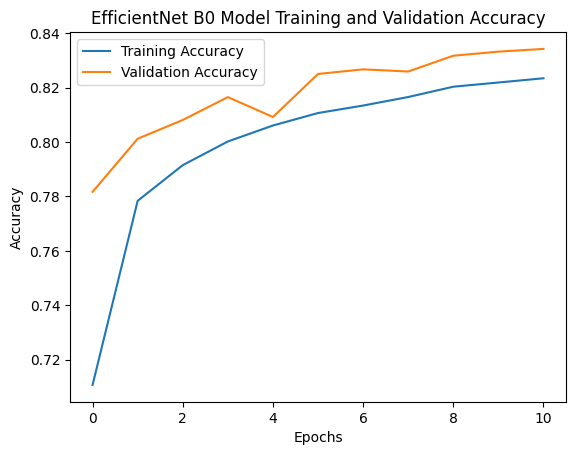

In [56]:
import matplotlib.pyplot as plt
plt.plot(history_pret.history['accuracy'], label= 'Training Accuracy')
plt.plot(history_pret.history['val_accuracy'], label= 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('EfficientNet B0 Model Training and Validation Accuracy')
plt.legend()
plt.show()

In [57]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score

y_pred_pret = model_pret.predict(X_test_resized)
y_pred_labels_pret = np.argmax(y_pred_pret, axis=1)

mae = mean_absolute_error(y_test, y_pred_labels_pret)
mse = mean_squared_error(y_test, y_pred_labels_pret)
precision = precision_score(y_test, y_pred_labels_pret, average='weighted')
recall = recall_score(y_test, y_pred_labels_pret, average='weighted')
f1 = f1_score(y_test, y_pred_labels_pret, average='weighted')
cm = confusion_matrix(y_test, y_pred_labels_pret)

313/313 [==============================] - 12s 31ms/step


In [58]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'f1 score {f1}')
print()
print(cm)

Mean Absolute Error (MAE): 0.5128
Mean Squared Error (MSE): 2.0568
Precision Score: 0.8377951783518495
Recall Score: 0.8342
f1 score 0.8348637405936379

[[723   4  15  79  10   3 141   0  21   4]
 [  0 950   4  32   6   1   5   0   2   0]
 [  9   2 763  14  97   0 108   0   7   0]
 [ 12  23   8 853  39   2  59   0   4   0]
 [  2   2 100  64 712   1 117   0   2   0]
 [  0   0   0   2   0 910   2  64   6  16]
 [ 89   4  66  70 124   2 623   0  18   4]
 [  0   0   0   0   0  23   0 946   0  31]
 [  4   2   6  12  16   6  18   2 931   3]
 [  0   1   0   0   0   9   0  52   7 931]]


### ***4. Models Evaluation***

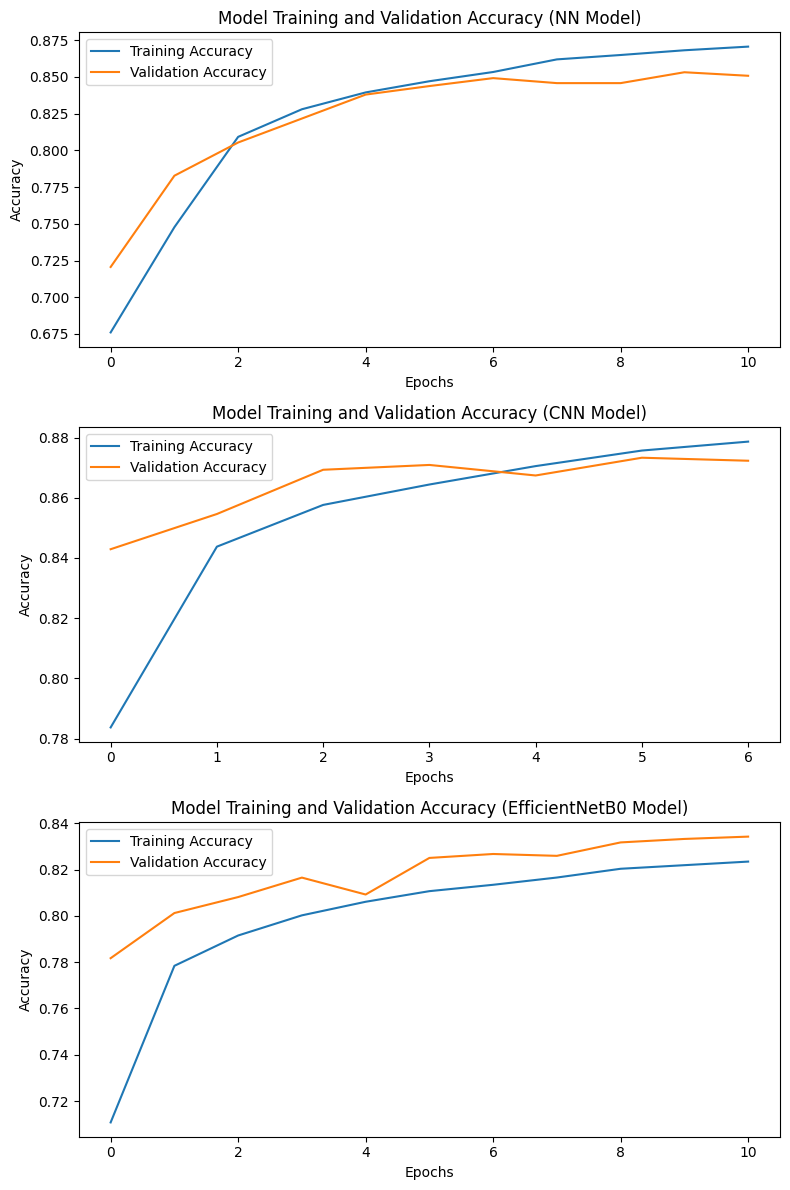

In [59]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(history_nn.history['accuracy'], label='Training Accuracy')
axs[0].plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Training and Validation Accuracy (NN Model)')
axs[0].legend()

axs[1].plot(history_cnn.history['accuracy'], label='Training Accuracy')
axs[1].plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Model Training and Validation Accuracy (CNN Model)')
axs[1].legend()

axs[2].plot(history_pret.history['accuracy'], label='Training Accuracy')
axs[2].plot(history_pret.history['val_accuracy'], label='Validation Accuracy')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Accuracy')
axs[2].set_title('Model Training and Validation Accuracy (EfficientNetB0 Model)')
axs[2].legend()

plt.tight_layout()

plt.show()


In [60]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score

metrics_nn = {
    'Model': ['NN'],
    'MAE': [mean_absolute_error(y_test, y_pred_labels_nn)],
    'MSE': [mean_squared_error(y_test, y_pred_labels_nn)],
    'Precision Score': [precision_score(y_test, y_pred_labels_nn, average='weighted')],
    'Recall Score': [recall_score(y_test, y_pred_labels_nn, average='weighted')],
    'F1 Score': [f1_score(y_test, y_pred_labels_nn, average='weighted')],
    'Confusion Matrix': [confusion_matrix(y_test, y_pred_labels_nn)]
}

metrics_cnn = {
    'Model': ['CNN'],
    'MAE': [mean_absolute_error(y_test, y_pred_labels_cnn)],
    'MSE': [mean_squared_error(y_test, y_pred_labels_cnn)],
    'Precision Score': [precision_score(y_test, y_pred_labels_cnn, average='weighted')],
    'Recall Score': [recall_score(y_test, y_pred_labels_cnn, average='weighted')],
    'F1 Score': [f1_score(y_test, y_pred_labels_cnn, average='weighted')],
    'Confusion Matrix': [confusion_matrix(y_test, y_pred_labels_cnn)]
}

metrics_pret = {
    'Model': ['EfficientNetB0'],
    'MAE': [mean_absolute_error(y_test, y_pred_labels_pret)],
    'MSE': [mean_squared_error(y_test, y_pred_labels_pret)],
    'Precision Score': [precision_score(y_test, y_pred_labels_pret, average='weighted')],
    'Recall Score': [recall_score(y_test, y_pred_labels_pret, average='weighted')],
    'F1 Score': [f1_score(y_test, y_pred_labels_pret, average='weighted')],
    'Confusion Matrix': [confusion_matrix(y_test, y_pred_labels_pret)]
}

In [61]:
df_nn = pd.DataFrame(metrics_nn)
df_cnn = pd.DataFrame(metrics_cnn)
df_pret = pd.DataFrame(metrics_pret)

In [62]:
df_all = pd.concat([df_nn, df_cnn, df_pret], ignore_index=True)

In [63]:
df_all

,Model,MAE,MSE,Precision Score,Recall Score,F1 Score,Confusion Matrix
0,NN,0.4923,2.0485,0.854257,0.8507,0.849500,"[[895, 0, 8, 14, 0, 0, 78, 0, 5, 0], [7, 951, ..."
1,CNN,0.4158,1.7286,0.872114,0.8723,0.870880,"[[869, 0, 31, 18, 8, 1, 70, 0, 3, 0], [3, 962,..."
2,EfficientNetB0,0.5128,2.0568,0.837795,0.8342,0.834864,"[[723, 4, 15, 79, 10, 3, 141, 0, 21, 4], [0, 9..."
